In [0]:
!pip install tensorflow
!pip install matplotlib
!pip install textblob tweepy matplotlib



In [0]:
from textblob import TextBlob
import sys,tweepy
import matplotlib.pyplot as plt



In [0]:
def percentage(part,whole):
  return 100 * float(part)/float(whole)
consumerKey ="bXfYQqvDKV707OS0TZp6RiyFX"
consumerSecret = "oV5W1Bs7Q1wvcEGOG8YQJ6LVRDIvkKryrTI1s7olnfa04QmiWZ"
accessToken = "969390328066162689-Tacmkra7d3wmh6tRsFB7IkvlR2pVbHL"
accessTokenSecret = "5vW6brQbU0HhwIfh8S3zefhitvclXftTLdlV08gh9bblW"

In [0]:
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)


In [0]:
searchTerm = input("Enter keyboard/hastag to search about: ")
noOfSearchTerms= int(input("Enter how many tweets to analyze: "))


Enter keyboard/hastag to search about: coronavirus
Enter how many tweets to analyze: 500


In [0]:
tweets = tweepy.Cursor(api.search, q=searchTerm, lang="English").items(noOfSearchTerms)

In [0]:
positive = 0
negative = 0
neutral = 0
polarity = 0


As the #coronavirus spreads throughout the world, stock markets plunge, what can traders do?
Join iFOREX to learn a… https://t.co/bt1xwmaBGP
@mitchellvii  Connections between Wuhan, Adrenochrome, the Coronavirus and Stocks (17th March 2020) [Jaguar Media]
https://t.co/MdMHO48PWg
Our right to health, but also rights to liberty, freedom of movement, to education, to information, to food and she… https://t.co/QXu3ZYE2eW
RT @SatterthwaiteML: New from @kathryn_sikkink @OGR_EN "Our biggest responsibility may be to figure out how to convert this crisis into a s…
@SarahDi75400668 @ArtyRichel As if 4G isnt fast enough?
We need to stop bombarding the planet with this shit.
https://t.co/9nDn2lQpYa
RT @SatterthwaiteML: New from @kathryn_sikkink @OGR_EN "Our biggest responsibility may be to figure out how to convert this crisis into a s…
https://t.co/afjRBKa02L
Rights and responsibilities in the Coronavirus pandemic | OpenGlobalRights https://t.co/DlrPcw3oI2
RT @AshlandDAET: Parents &amp; other car

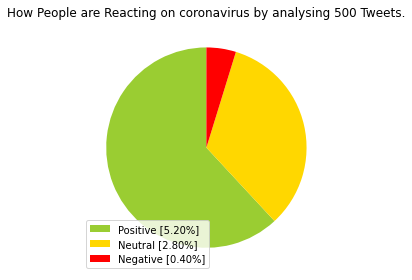

In [0]:
for tweet in tweets:
  print(tweet.text)
  analysis = TextBlob(tweet.text)
  polarity += analysis.sentiment.polarity

  if (analysis.sentiment.polarity ==0):
    neutral += 1
  elif (analysis.sentiment.polarity < 0.00):
    negative += 1
  elif (analysis.sentiment.polarity > 0.00):
    positive += 1

positive = percentage(positive, noOfSearchTerms)
negative = percentage(negative, noOfSearchTerms)
neutral = percentage(neutral, noOfSearchTerms)  
polarity = percentage(polarity, noOfSearchTerms)

positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

print(" How People are Reacting on " + searchTerm + " by Analysing " + str(noOfSearchTerms) + " Tweets.")

if (polarity == 0):
  print("Neutral")
elif (polarity < 0.00):
  print("Negative")
elif (polarity > 0.00):
  print("Positive")

labels = ['Positive [' +str(positive)+'%]', 'Neutral [' + str(neutral) + '%]', 'Negative [' +str(negative) + '%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold', 'red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('How People are Reacting on '+searchTerm+' by analysing '+str(noOfSearchTerms)+' Tweets.')
plt.axis=('equal')
plt.tight_layout()
plt.show()